<a href="https://colab.research.google.com/github/dilaraogz/AcunmedyaAkademiAI/blob/main/DLkalphastal%C4%B1%C4%9F%C4%B1tahminipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.3 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Dosyayı oku
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak          

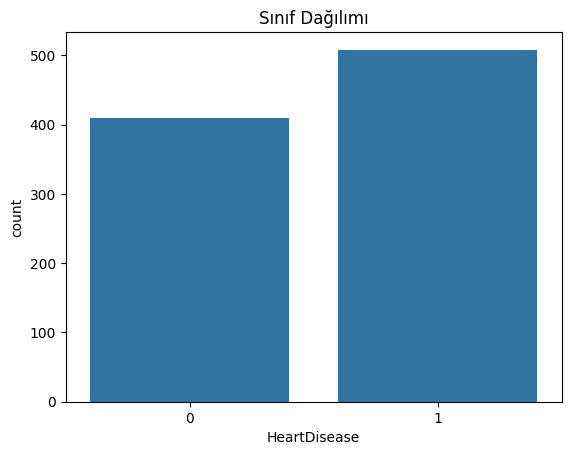

In [8]:
print(df.info())
print(df.isnull().sum())

sns.countplot(x="HeartDisease", data=df)
plt.title("Sınıf Dağılımı")
plt.show()


In [9]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Kategorik sütunları bul
categorical_cols = X.select_dtypes(include=['object']).columns
print("Kategorik Sütunlar:", list(categorical_cols))

# Her kategorik sütunu label encode et
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


Kategorik Sütunlar: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
class HeartDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = HeartDataset(X_train, y_train)
val_ds = HeartDataset(X_val, y_val)
test_ds = HeartDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)


In [12]:
class HeartDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = HeartDataset(X_train, y_train)
val_ds = HeartDataset(X_val, y_val)
test_ds = HeartDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)


In [13]:
class HeartModel(nn.Module):
    def __init__(self, input_size):
        super(HeartModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

model = HeartModel(X_train.shape[1])


In [14]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, epochs=50):
    train_loss_values = []
    val_loss_values = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch).squeeze()
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_loss_values.append(total_loss / len(train_loader))

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch).squeeze()
                loss = loss_fn(y_pred, y_batch)
                val_loss += loss.item()
        val_loss_values.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1}, Train Loss: {train_loss_values[-1]:.4f}, Val Loss: {val_loss_values[-1]:.4f}")

    return train_loss_values, val_loss_values

train_loss, val_loss = train_model(model, train_loader, val_loader)


Epoch 1, Train Loss: 0.6606, Val Loss: 0.6052
Epoch 2, Train Loss: 0.5696, Val Loss: 0.4865
Epoch 3, Train Loss: 0.4631, Val Loss: 0.3804
Epoch 4, Train Loss: 0.3928, Val Loss: 0.3377
Epoch 5, Train Loss: 0.4087, Val Loss: 0.3270
Epoch 6, Train Loss: 0.3536, Val Loss: 0.3189
Epoch 7, Train Loss: 0.3498, Val Loss: 0.3119
Epoch 8, Train Loss: 0.3553, Val Loss: 0.3105
Epoch 9, Train Loss: 0.3345, Val Loss: 0.3015
Epoch 10, Train Loss: 0.3258, Val Loss: 0.3027
Epoch 11, Train Loss: 0.3199, Val Loss: 0.3051
Epoch 12, Train Loss: 0.3226, Val Loss: 0.2988
Epoch 13, Train Loss: 0.3155, Val Loss: 0.2936
Epoch 14, Train Loss: 0.3161, Val Loss: 0.2922
Epoch 15, Train Loss: 0.3150, Val Loss: 0.2859
Epoch 16, Train Loss: 0.3029, Val Loss: 0.2881
Epoch 17, Train Loss: 0.2980, Val Loss: 0.2891
Epoch 18, Train Loss: 0.3148, Val Loss: 0.2881
Epoch 19, Train Loss: 0.3008, Val Loss: 0.2988
Epoch 20, Train Loss: 0.2944, Val Loss: 0.2977
Epoch 21, Train Loss: 0.3516, Val Loss: 0.2906
Epoch 22, Train Loss: 

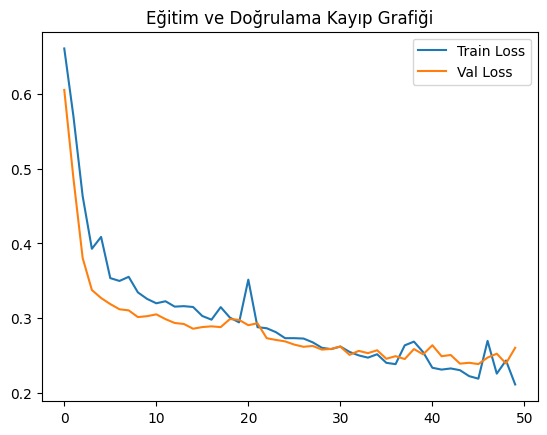

In [15]:
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Eğitim ve Doğrulama Kayıp Grafiği")
plt.legend()
plt.show()


              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        55
         1.0       0.96      0.87      0.91        83

    accuracy                           0.90       138
   macro avg       0.89      0.91      0.90       138
weighted avg       0.91      0.90      0.90       138



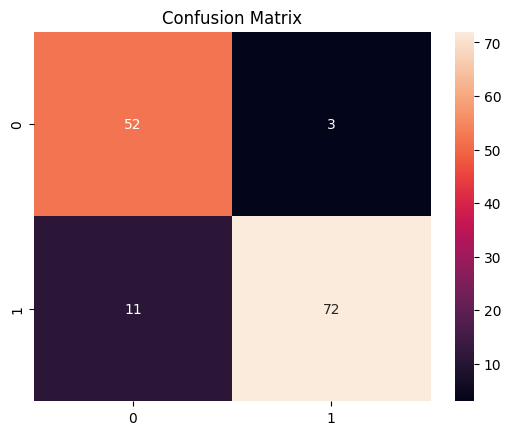

In [16]:
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch).squeeze()
        preds = (y_pred > 0.5).float()
        all_preds.extend(preds.numpy())
        all_targets.extend(y_batch.numpy())

print(classification_report(all_targets, all_preds))

sns.heatmap(confusion_matrix(all_targets, all_preds), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()
